In [6]:
from typing import Dict
from glob import glob
import matplotlib.pyplot as plt
import os

In [7]:
def read_file(path: str) -> Dict[str, list]:
    gestures_lengths = {}
    with open(path, 'r') as file:
        for line in file:
            trimmed_line = line.strip()
            start, end, gesture = trimmed_line.split()
            if gesture not in gestures_lengths:
                gestures_lengths[gesture] = []
            start, end = int(start), int(end)
            gestures_lengths[gesture].append(end - start + 1)
    return gestures_lengths

In [8]:
read_file('../APAS/transcriptions_gestures/P016_balloon1.txt')

{'G0': [525, 96, 239, 63, 252, 9, 70, 302],
 'G1': [138, 339, 201],
 'G2': [146, 147, 90],
 'G3': [90, 75, 51, 90, 66, 168, 84, 54, 66, 92, 54, 40, 48],
 'G4': [72, 57, 45, 51, 63, 81, 39, 57, 57, 64, 44, 98, 42],
 'G5': [39, 21, 26]}

In [9]:
all_files = glob('../APAS/transcriptions_gestures/*.txt')

In [10]:
all_gestures_lengths = {}
for path in all_files:
    gestures_lengths = read_file(path)
    for gesture, lengths in gestures_lengths.items():
        if gesture not in all_gestures_lengths:
            all_gestures_lengths[gesture] = []
        all_gestures_lengths[gesture].extend(lengths)

In [11]:
gesture_to_description = {"G0": "no gesture",
                          "G1": "needle passing",
                          "G2": "pull the suture",
                          "G3": "instrument tie",
                          "G4": "lay the knot",
                          "G5": "cut the suture"}

gesture_to_color = {"G0": "#00004c",
                    "G1": "#0000db",
                    "G2": "#9999ff",
                    "G3": "#ff9999",
                    "G4": "#e50000",
                    "G5": "#7f0000"}

In [12]:
gestures_average_length = {}
for gesture, lengths in all_gestures_lengths.items():
    gestures_average_length[gesture_to_description[gesture]] = (sum(lengths) / len(lengths)) / 30

In [13]:
gestures_average_length

{'no gesture': 7.451147752990624,
 'needle passing': 8.880194518125553,
 'pull the suture': 4.875245755138517,
 'instrument tie': 2.6621883656509695,
 'lay the knot': 2.855305466237942,
 'cut the suture': 1.8446290143964563}

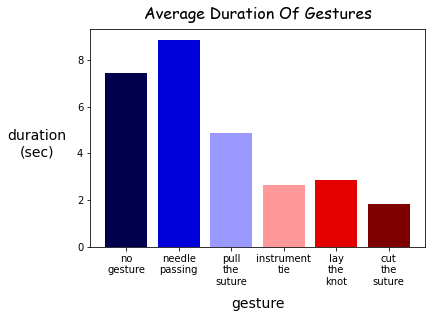

In [35]:
bar_labels = [desc.replace(' ', '\n') for desc in gestures_average_length.keys()]
bar_heights = gestures_average_length.values()
bar_colors = gesture_to_color.values()

plt.bar(bar_labels, bar_heights, color=bar_colors)
plt.xlabel('gesture', size=14, labelpad=10)
plt.ylabel('duration\n(sec)', size=14, labelpad=40, rotation=0, y=0.40)
plt.title('Average Duration Of Gestures', size=16, pad=10, font='Comic Sans MS')
plt.show()

In [15]:
all_gestures_percentages = {}
for path in all_files:
    gestures_lengths = read_file(path)
    video_length = 0
    gestures_total_length = {}
    for gesture, lengths in gestures_lengths.items():
        total = sum(lengths)
        gestures_total_length[gesture] = total
        video_length += total

    for gesture, lengths in gestures_lengths.items():
        if gesture not in all_gestures_percentages:
            all_gestures_percentages[gesture] = []
        all_gestures_percentages[gesture].append(gestures_total_length[gesture] / video_length)


In [16]:
all_gestures_average_percentage = {}
for gesture, averages in all_gestures_percentages.items():
    all_gestures_average_percentage[gesture] = (sum(averages) / len(averages)) * 100

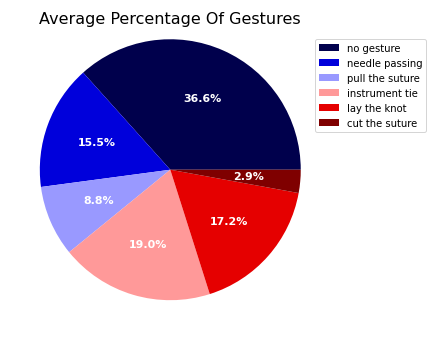

In [17]:
pie_values = list(all_gestures_average_percentage.values())
pie_labels = [gesture_to_description[desc] for desc in all_gestures_average_percentage.keys()]

plt.figure(figsize=(10, 6))
plt.title('Average Percentage Of Gestures', size=16, y=0.93)
plt.pie(pie_values, autopct='%1.1f%%', colors=['#00004c', '#0000db', '#9999ff', '#ff9999', '#e50000', '#7f0000'],
        textprops={'color': "w", 'weight': 'bold', 'size': 11})
plt.legend(pie_labels, loc='upper right', bbox_to_anchor=(1.3, 0.915))

plt.show()

In [18]:
all_gestures_average_percentage2 = {}

total_videos_length = 0
for gesture, lengths in all_gestures_lengths.items():
    total_videos_length += sum(lengths)

for gesture, lengths in all_gestures_lengths.items():
    all_gestures_average_percentage2[gesture] = (sum(lengths) / total_videos_length) * 100

In [19]:
all_gestures_average_percentage2

{'G0': 36.933570086987736,
 'G1': 16.0954557401009,
 'G2': 8.742684247975948,
 'G3': 18.481849242623348,
 'G4': 17.077032545080417,
 'G5': 2.669408137231649}

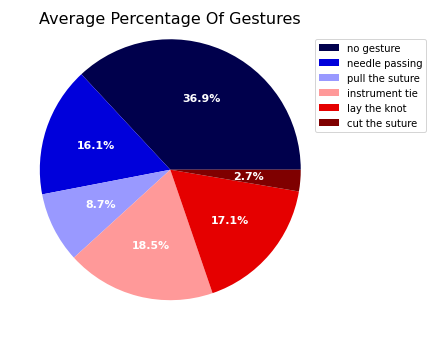

In [20]:
pie_values2 = list(all_gestures_average_percentage2.values())
pie_labels2 = [gesture_to_description[desc] for desc in all_gestures_average_percentage2.keys()]

plt.figure(figsize=(10, 6))
plt.title('Average Percentage Of Gestures', size=16, y=0.93)
plt.pie(pie_values2, autopct='%1.1f%%', colors=['#00004c', '#0000db', '#9999ff', '#ff9999', '#e50000', '#7f0000'],
        textprops={'color': "w", 'weight': 'bold', 'size': 11})
plt.legend(pie_labels2, loc='upper right', bbox_to_anchor=(1.3, 0.915))

plt.show()

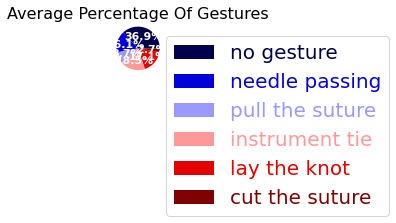

In [64]:
pie_values2 = list(all_gestures_average_percentage2.values())
pie_labels2 = [gesture_to_description[desc] for desc in all_gestures_average_percentage2.keys()]

plt.figure(figsize=(1, 1))
plt.title('Average Percentage Of Gestures', size=16, y=0.93)
plt.pie(pie_values2, autopct='%1.1f%%', colors=['#00004c', '#0000db', '#9999ff', '#ff9999', '#e50000', '#7f0000'],
        textprops={'color': "w", 'weight': 'bold', 'size': 11})
plt.legend(pie_labels2, loc='upper right', bbox_to_anchor=(5.3, 0.915), prop={'size': 20}, labelcolor='linecolor')

plt.show()

In [21]:
videos_lengths = {}
for path in all_files:
    gestures_lengths = read_file(path)
    file_name = os.path.basename(path).split('.')[0]
    total_length = 0
    for lengths in gestures_lengths.values():
        total_length += sum(lengths)
    videos_lengths[file_name] = total_length / (30 * 60)

In [22]:
max(videos_lengths.values())

8.276111111111112

In [23]:
min(videos_lengths.values())

1.4983333333333333

In [213]:
from collections import Counter
c = Counter(videos_lengths.values())

In [217]:
c

Counter({148.36666666666667: 1,
         130.36666666666667: 1,
         225.06666666666666: 1,
         189.03333333333333: 1,
         131.73333333333332: 1,
         111.2: 1,
         153.1: 1,
         151.0: 1,
         131.86666666666667: 1,
         122.66666666666667: 1,
         182.56666666666666: 1,
         129.73333333333332: 1,
         147.56666666666666: 1,
         124.06666666666666: 1,
         153.0: 1,
         164.3: 1,
         232.73333333333332: 1,
         246.86666666666667: 1,
         334.23333333333335: 1,
         325.7: 1,
         124.8: 1,
         125.46666666666667: 1,
         189.7: 1,
         170.36666666666667: 1,
         253.36666666666667: 1,
         256.8: 1,
         331.3666666666667: 1,
         330.46666666666664: 1,
         205.56666666666666: 1,
         193.03333333333333: 1,
         322.8: 1,
         391.03333333333336: 1,
         225.4: 1,
         223.03333333333333: 1,
         369.06666666666666: 1,
         312.4: 1,
     

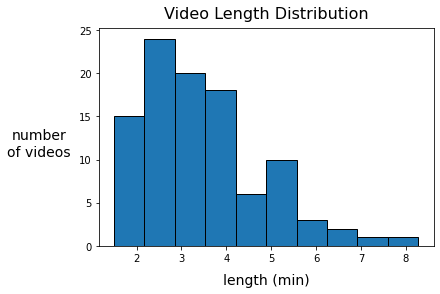

In [40]:
plt.hist(videos_lengths.values(), edgecolor="black")
plt.xlabel('length (min)', size=14, labelpad=10)
plt.ylabel('number\nof videos', size=14, labelpad=40, rotation=0, y=0.40)
plt.title('Video Length Distribution', size=16, pad=10)
plt.show()

In [3]:
import numpy as np

In [4]:
mat = np.load('../APAS/features/fold0/P016_balloon1.npy')

In [5]:
mat.shape

(1280, 4450)

In [43]:
def get_video_length(vid_path):
    with open(vid_path, 'r') as file:
        last = file.readlines()[-1]
        return int(last.split()[1])

In [44]:
lengths
for p in all_files:
    l =  get_video_length(p)
    print(p,)

../APAS/transcriptions_gestures\P016_balloon1.txt 4450
../APAS/transcriptions_gestures\P016_balloon2.txt 3910
../APAS/transcriptions_gestures\P016_tissue1.txt 6751
../APAS/transcriptions_gestures\P016_tissue2.txt 5670
../APAS/transcriptions_gestures\P017_balloon1.txt 3951
../APAS/transcriptions_gestures\P017_balloon2.txt 3335
../APAS/transcriptions_gestures\P017_tissue1.txt 4592
../APAS/transcriptions_gestures\P017_tissue2.txt 4529
../APAS/transcriptions_gestures\P018_balloon1.txt 3955
../APAS/transcriptions_gestures\P018_balloon2.txt 3679
../APAS/transcriptions_gestures\P018_tissue1.txt 5476
../APAS/transcriptions_gestures\P018_tissue2.txt 3891
../APAS/transcriptions_gestures\P019_balloon1.txt 4426
../APAS/transcriptions_gestures\P019_balloon2.txt 3721
../APAS/transcriptions_gestures\P019_tissue1.txt 4589
../APAS/transcriptions_gestures\P019_tissue2.txt 4928
../APAS/transcriptions_gestures\P020_balloon1.txt 6981
../APAS/transcriptions_gestures\P020_balloon2.txt 7405
../APAS/transcript

In [51]:
ls = {g: round(l*30*60) for g, l in videos_lengths.items()}

In [54]:
sorted(ls.items(), key=lambda k: k[1])

[('P040_balloon1', 2697),
 ('P040_balloon2', 3111),
 ('P035_balloon2', 3146),
 ('P017_balloon2', 3336),
 ('P039_balloon1', 3500),
 ('P035_balloon1', 3604),
 ('P039_balloon2', 3669),
 ('P018_balloon2', 3680),
 ('P019_balloon2', 3722),
 ('P021_balloon1', 3744),
 ('P021_balloon2', 3764),
 ('P039_tissue2', 3875),
 ('P018_tissue2', 3892),
 ('P040_tissue2', 3901),
 ('P016_balloon2', 3911),
 ('P017_balloon1', 3952),
 ('P018_balloon1', 3956),
 ('P038_balloon1', 3964),
 ('P038_balloon2', 3977),
 ('P037_balloon2', 4004),
 ('P034_balloon2', 4083),
 ('P025_balloon2', 4349),
 ('P032_balloon2', 4353),
 ('P034_balloon1', 4401),
 ('P019_balloon1', 4427),
 ('P037_balloon1', 4447),
 ('P016_balloon1', 4451),
 ('P017_tissue2', 4530),
 ('P039_tissue1', 4555),
 ('P019_tissue1', 4590),
 ('P017_tissue1', 4593),
 ('P040_tissue1', 4636),
 ('P027_balloon2', 4681),
 ('P036_balloon2', 4681),
 ('P025_tissue2', 4908),
 ('P019_tissue2', 4929),
 ('P035_tissue1', 4998),
 ('P025_balloon1', 5042),
 ('P021_tissue2', 5111)